In [1]:
import pandas as pd
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### scatter 그래프

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'weight')

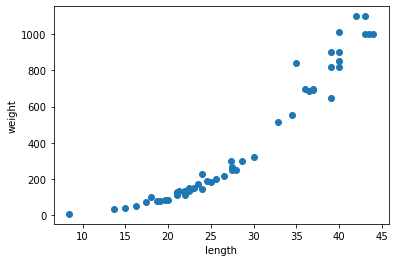

In [6]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

### 학습/테스트 세트 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.2, random_state=42)

In [10]:
# 분리된 학습/테스트 세트 모양 확인
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(44,) (12,)
(44,) (12,)


### k-최근접 이웃 회귀 모델 훈련

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
# 2차원 배역로 바꾸기
train_input= train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [15]:
knr=KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [17]:
# 테스트 데이터 모델 점수 확인
knr.score(test_input,test_target)

0.9932626838364674

In [20]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)
print(test_prediction )

[  60.    79.6  258.6  122.   136.   847.   275.   183.4  847.   113.
 1010.    60. ]


In [22]:
# 테스트 세트에 대한 평균 절댓값 오차 계산
# mean_absolute_error : 절댓값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

21.433333333333337


In [24]:
# 훈련데이터 모델 점수
print(knr.score(train_input,train_target))
# 과소 적합

0.9699886106745992


In [26]:
#이웃의 개수를 적게 설정
knr.n_neighbors = 3
# 모델 재훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [27]:
print(knr.score(train_input, train_target))

0.9803764248982696


In [28]:
print(knr.score(test_input, test_target))
# 과대 적합

0.9761346952012298


```
과소적합이면 이웃의 개수를 늘리고, 과대적합이면 이웃의 개수를 줄인다.
이웃의 개수를 줄이면, 훈련 세트에 있는 패턴에 민감해지고,
이웃의 개수를 늘리면, 데이터 전반에 있는 패턴을 따른다.
```

### 확인 문제

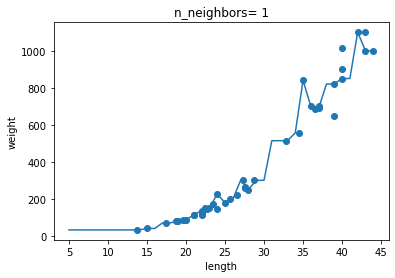

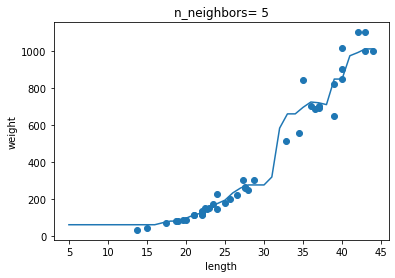

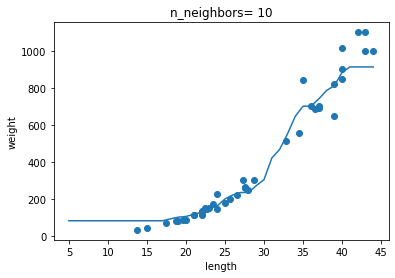

In [32]:
# k-최근접 이웃 회귀 객체를 만들어 줌
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만들어 줌
x = np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그려줌

for n in [1,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x,prediction)
    plt.title('n_neighbors= {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()